In [3]:
import import_ipynb
from Hamiltonian_solver import *


In [5]:
import sys
print(sys.executable)


c:\Users\iamga\anaconda3\python.exe


In [18]:
(np.sin((100000/10000)*(np.pi/2)))**2

np.float64(3.7493994566546447e-31)

In [6]:
mag_sen = generate_magnetic_field(4.209)

In [7]:
transition_strengths = np.array([[np.nan, 0.0563, 0.055, 0.0519, 0.0341],
                        [0.0753, 0.0246, 0.0096, 0.0336, 0.056],
                        [0.053, 0.0598, 0.047, 0.0355, np.nan],
                        [np.nan, np.nan, 0.1103, 0.1061, 0.0819],
                        [np.nan, 0.1273, 0.0275, 0.0613, 0.0981],
                        [0.0973, 0.0635, 0.0919, 0.0258, 0.0932],
                        [0.1163, 0.0281, 0.0575, 0.107, np.nan],
                        [0.1105, 0.1056, 0.0814, np.nan, np.nan],
                        [np.nan, np.nan, np.nan, 0.2813, 0.0091],
                        [np.nan, np.nan, 0.2288, 0.1549, 0.0415],
                        [np.nan, 0.1517, 0.2135, 0.0697, 0.0446],
                        [0.0763, 0.2008, 0.1741, 0.003, 0.0359],
                        [0.1367, 0.2351, 0.0773, 0.039, np.nan],
                        [0.2241, 0.1763, 0.0106, np.nan, np.nan],
                        [0.268, 0.0634, np.nan, np.nan, np.nan],
                        [np.nan, np.nan, np.nan, np.nan, 0.3278],
                        [np.nan, np.nan, np.nan, 0.0828, 0.268],
                        [np.nan, np.nan, 0.0019, 0.1664, 0.234],
                        [np.nan, 0.025, 0.0679, 0.2278, 0.1523],
                        [0.0232, 0.001, 0.156, 0.2077, 0.0915],
                        [0.0309, 0.0593, 0.206, 0.1694, np.nan],
                        [0.0276, 0.1438, 0.2401, np.nan, np.nan],
                        [0.0094, 0.2862, np.nan, np.nan, np.nan],
                        [0.3278, np.nan, np.nan, np.nan, np.nan]])
mag_sen[np.isnan(transition_strengths)] = np.nan

In [8]:
freqs = generate_frequencies_at(4.209)

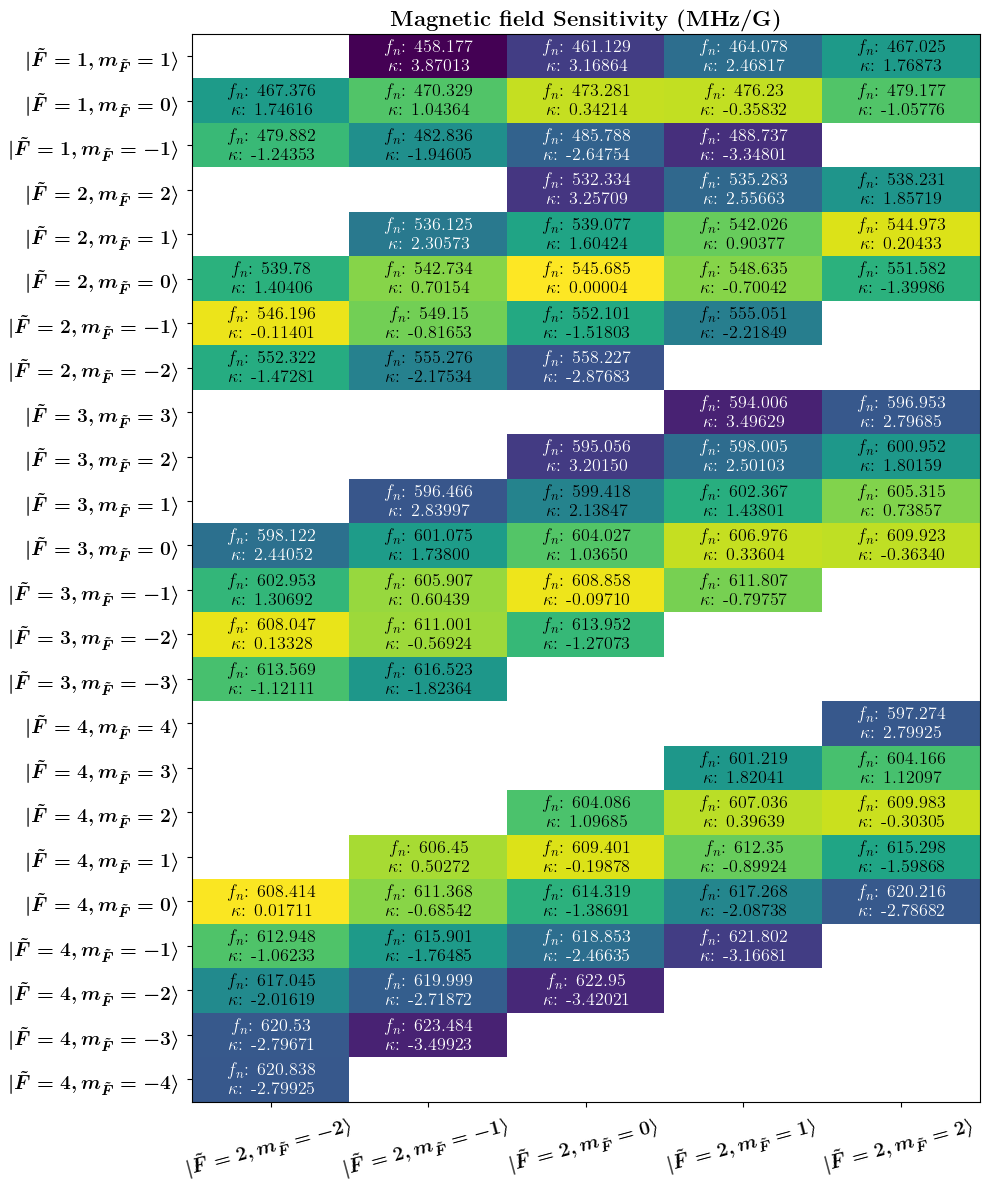

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

from matplotlib import rcParams
import matplotlib.lines as mlines
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

# Increase font sizes
rcParams['axes.titlesize'] = 28      # Title of the plot
rcParams['axes.labelsize'] = 20      # Axis labels
rcParams['xtick.labelsize'] = 24     # X tick labels
rcParams['ytick.labelsize'] = 24     # Y tick labels
rcParams['legend.fontsize'] = 18     # Legend text
rcParams['figure.titlesize'] = 28    # Figure-wide title (if used)


Fs = [1,2,3,4]
row_labels = []
for i in Fs:
    for j in range(2*i+1):
        mF = i-j
        row_labels.append([i,mF])
col_labels = [-2, -1, 0, 1, 2]

ket_lables_row = []
for i in row_labels:
    # ket_lables_row.append(r'$|\tilde{{F}} =$'+ f'{i[0]}'+r'$,m_\tilde{{F}} = $'+f'{i[1]}'+r'$ \rangle$')
    # ket_lables_row.append(rf'$|\tilde{{F}} = {i[0]},\,m_\tilde{{F}} = {i[1]}\rangle$')
    # ket_lables_row.append(rf'$\left|\tilde{{F}} = {i[0]},\,m_\tilde{{F}} = {i[1]}\right\rangle$')
     ket_lables_row.append(rf'\boldmath$|\tilde{{F}} = {i[0]}, m_{{\tilde{{F}}}} = {i[1]}\rangle$')
    # ket_lables_row.append('1')

ket_lables_col = []
for i in col_labels:
    ket_lables_col.append(rf'\boldmath$|\tilde{{F}} = 2, m_{{\tilde{{F}}}} = {i}\rangle$')
    # ket_lables_col.append('1')


# Create figure and set size
fig, ax = plt.subplots(figsize=(10, 12))
cax = ax.imshow(np.abs(mag_sen), aspect='auto', cmap='viridis_r')

# Add labels
ax.set_xticks(np.arange(len(col_labels)))
ax.set_yticks(np.arange(len(row_labels)))
ax.set_xticklabels(ket_lables_col, rotation=15, ha='center', fontsize=14)
ax.set_yticklabels(ket_lables_row, fontsize=14)

# # Annotate each cell with the numerical value
norm = Normalize(vmin=mag_sen.min(), vmax=mag_sen.max())
sm = ScalarMappable(norm=norm, cmap='viridis')

for i in range(len(row_labels)):
    for j in range(len(col_labels)):
        value = mag_sen[i, j]
        freq_val = freqs[i,j]
        color = sm.to_rgba(value)
        luminance = (0.299 * color[0] + 0.587 * color[1] + 0.114 * color[2])
        text_color = 'white' if np.abs(value) > 2.3 else 'black'
        # print(type(value))
        if not np.isnan(value):
            label_text = (
                rf'$f_n$: {np.round(freq_val, 3)}' + '\n' +
                rf'$\kappa$: {value:.5f}'
            )
            ax.text(j, i, label_text, ha='center', va='center', color=text_color, fontsize=13)

            # ax.text(j, i, rf'$f_n:${np.round(freq_val,3)}'+'\n' + rf'$\kappa:${value:.5f}', ha='center', va='center', color=text_color, fontsize=10)
# print(this worked)
# Add colorbar
# cbar = fig.colorbar(cax)
# plt.show()
# Set title
ax.set_title(r'\textbf{Magnetic field Sensitivity (MHz/G)}', fontsize=16)
plt.tight_layout()
plt.savefig('magnetic_field_sensitivity.svg')
plt.show()


In [10]:
x = np.nan
if np.isnan(x):
    print('Ture')

Ture


In [11]:
%matplotlib widget

In [12]:
trans_strength = TransitionStrength(4.209)

In [13]:
trans_strength_F2 = trans_strength[:,3:]
print(trans_strength_F2)
trans_strength_F2[np.isnan(transition_strengths)] = np.nan

[[0.         0.05632874 0.05500089 0.05187909 0.03406999]
 [0.07523755 0.02456956 0.00959979 0.0336018  0.05602483]
 [0.05299213 0.05980132 0.04697469 0.03553417 0.        ]
 [0.         0.         0.11030796 0.10613917 0.08193567]
 [0.         0.12732237 0.02754136 0.06123679 0.09809664]
 [0.09731492 0.06350213 0.09191606 0.02582719 0.09322864]
 [0.1162616  0.02818611 0.05749718 0.10701074 0.        ]
 [0.11048562 0.1056066  0.08140579 0.         0.        ]
 [0.         0.         0.         0.28134378 0.00906897]
 [0.         0.         0.22882491 0.15491115 0.0415006 ]
 [0.         0.15171663 0.21346514 0.06966876 0.04457934]
 [0.07630705 0.20082774 0.1740406  0.00305312 0.03589151]
 [0.13667826 0.23513595 0.07723302 0.03897723 0.        ]
 [0.22408857 0.17624375 0.01058436 0.         0.        ]
 [0.26801168 0.06338959 0.         0.         0.        ]
 [0.         0.         0.         0.         0.32779429]
 [0.         0.         0.         0.08277801 0.26802297]
 [0.         0

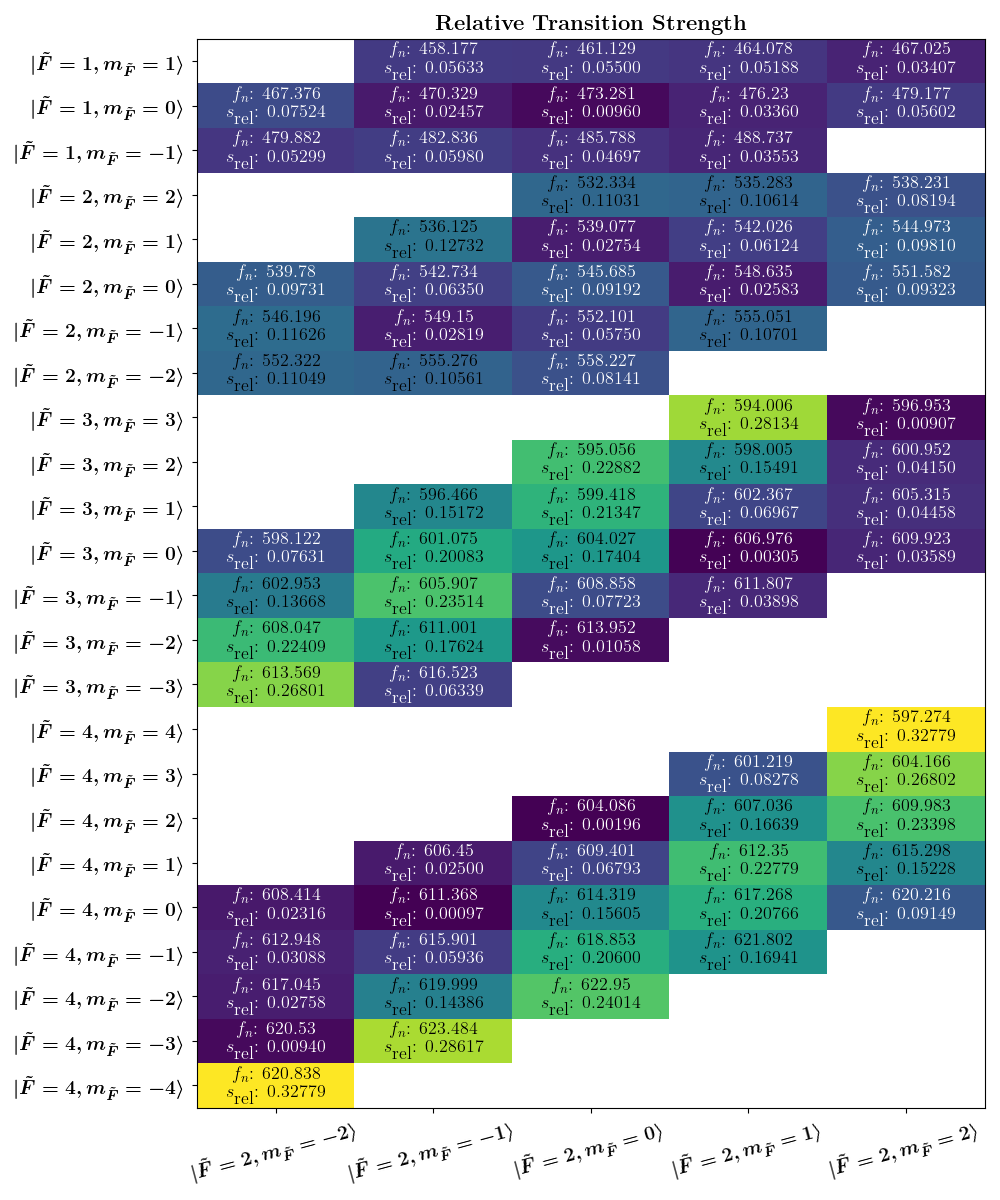

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

from matplotlib import rcParams
import matplotlib.lines as mlines
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

# Increase font sizes
rcParams['axes.titlesize'] = 28      # Title of the plot
rcParams['axes.labelsize'] = 20      # Axis labels
rcParams['xtick.labelsize'] = 24     # X tick labels
rcParams['ytick.labelsize'] = 24     # Y tick labels
rcParams['legend.fontsize'] = 18     # Legend text
rcParams['figure.titlesize'] = 28    # Figure-wide title (if used)


Fs = [1,2,3,4]
row_labels = []
for i in Fs:
    for j in range(2*i+1):
        mF = i-j
        row_labels.append([i,mF])
col_labels = [-2, -1, 0, 1, 2]

ket_lables_row = []
for i in row_labels:
    # ket_lables_row.append(r'$|\tilde{{F}} =$'+ f'{i[0]}'+r'$,m_\tilde{{F}} = $'+f'{i[1]}'+r'$ \rangle$')
    # ket_lables_row.append(rf'$|\tilde{{F}} = {i[0]},\,m_\tilde{{F}} = {i[1]}\rangle$')
    # ket_lables_row.append(rf'$\left|\tilde{{F}} = {i[0]},\,m_\tilde{{F}} = {i[1]}\right\rangle$')
     ket_lables_row.append(rf'\boldmath$|\tilde{{F}} = {i[0]}, m_{{\tilde{{F}}}} = {i[1]}\rangle$')
    # ket_lables_row.append('1')

ket_lables_col = []
for i in col_labels:
    ket_lables_col.append(rf'\boldmath$|\tilde{{F}} = 2, m_{{\tilde{{F}}}} = {i}\rangle$')
    # ket_lables_col.append('1')


# Create figure and set size
fig, ax = plt.subplots(figsize=(10, 12))
cax = ax.imshow(np.abs(trans_strength_F2), aspect='auto', cmap='viridis')

# Add labels
ax.set_xticks(np.arange(len(col_labels)))
ax.set_yticks(np.arange(len(row_labels)))
ax.set_xticklabels(ket_lables_col, rotation=15, ha='center', fontsize=14)
ax.set_yticklabels(ket_lables_row, fontsize=14)

# # Annotate each cell with the numerical value
norm = Normalize(vmin=trans_strength_F2.min(), vmax=trans_strength_F2.max())
sm = ScalarMappable(norm=norm, cmap='viridis')

for i in range(len(row_labels)):
    for j in range(len(col_labels)):
        value = trans_strength_F2[i, j]
        freq_val = freqs[i,j]
        color = sm.to_rgba(value)
        luminance = (0.299 * color[0] + 0.587 * color[1] + 0.114 * color[2])
        text_color = 'white' if np.abs(value) < 0.1 else 'black'
        # print(type(value))
        if not np.isnan(value):
            label_text = (
                rf'$f_n$: {np.round(freq_val, 3)}' + '\n' +
                rf'$s_{{\textrm{{rel}}}}$: {value:.5f}'
            )
            ax.text(j, i, label_text, ha='center', va='center', color=text_color, fontsize=13)

            # ax.text(j, i, rf'$f_n:${np.round(freq_val,3)}'+'\n' + rf'$\kappa:${value:.5f}', ha='center', va='center', color=text_color, fontsize=10)
# print(this worked)
# Add colorbar
# cbar = fig.colorbar(cax)
# plt.show()
# Set title
ax.set_title(r'\textbf{Relative Transition Strength}', fontsize=16)
plt.tight_layout()
plt.savefig('transition_strength.svg')
plt.show()


In [15]:
import numpy as np

trans_strength[trans_strength == 0] = np.nan
transition_strength = trans_strength[:,3:]
pi_t = [18.622, 31.746, 37.865, 27.596, 36.429]
strengths = np.array([transition_strength[23,0],transition_strength[14,0],transition_strength[17,4],transition_strength[16,4],transition_strength[15,4]])
pitime_n2 = pi_t[0] # [-2, 4, -4]
pitime_n1 = pi_t[1] # [-2, 3, -3]
pitime_0 = pi_t[2] # [2, 4, 2]
pitime_p1 = pi_t[3] # [2, 4, 3]
pitime_p2 = pi_t[4] # [2, 4, 4]

pi_t = np.array([pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2])
factors = pi_t * strengths
Fs = [1,2,3,4]
row_labels = []
for i in Fs:
    for j in range(2*i+1):
        mF = i-j
        row_labels.append([i,mF])
col_labels = [-2, -1, 0, 1, 2]

pi_times = np.zeros((24,5))
for i in range(np.shape(transition_strength)[0]):
    for j in range(np.shape(transition_strength)[1]):
        # print(i,j)
        if not np.isnan(transition_strength[i,j]):

            delta_m = (row_labels[i][1]-col_labels[j])+2

            pi_times[i,j] = factors[delta_m]/transition_strength[i,j]
print(pi_times)

[[   0.          211.99156184  134.47714115  170.77633906  249.7299744 ]
 [ 158.71354375  301.03755723  922.90749553  253.20965284  108.95499211]
 [ 139.57472533  148.15260263  181.1251919   171.78354385    0.        ]
 [   0.            0.          108.25345553   69.68550552  108.13021934]
 [   0.           93.78727563  268.55475241  144.6797146    86.73384613]
 [ 122.70696274  116.4742307    96.38926995  329.43180944   65.47542964]
 [  63.61826845  314.32933431  147.97766432   57.04273344    0.        ]
 [  80.18891401   80.56597804   74.98465446    0.            0.        ]
 [   0.            0.            0.           42.44351203  815.56835914]
 [   0.            0.           52.18495734   47.74583278  213.48419767]
 [   0.           78.70737983   34.64903793  127.16920976  190.85743034]
 [ 156.48906382   36.82938298   50.90606118 2786.75780086  170.07325583]
 [  54.11513053   37.67914543  110.1640078   156.60900775    0.        ]
 [  39.53669572   48.27574735  576.71736004    0.  

In [16]:
cali_trans = [(-2, 1, -1),
 (-2, 1, 0),
 (-2, 2, -2),
 (-2, 2, -1),
 (-2, 2, 0),
 (-2, 3, -3),
 (-2, 3, -2),
 (-2, 3, -1),
 (-2, 4, -4),
 (-1, 1, -1),
 (-1, 1, 1),
 (-1, 2, 0),
 (-1, 3, -2),
 (-1, 3, -1),
 (-1, 3, 0),
 (-1, 4, -2),
 (0, 1, 1),
 (0, 2, 2),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 4, -2),
 (0, 4, -1),
 (0, 4, 0),
 (0, 4, 1),
 (1, 1, 1),
 (1, 2, 2),
 (1, 3, 2),
 (1, 3, 3),
 (1, 4, -1),
 (1, 4, 0),
 (1, 4, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4)]
cali_trans_list = []
for i in cali_trans:
    cali_trans_list.append(list(i))

C:\Users\iamga\AppData\Local\Temp\ipykernel_48876\592021835.py:45: RuntimeWarning: divide by zero encountered in log
  cax = ax.imshow(np.log(pi_times), aspect='auto', cmap='viridis_r')
C:\Users\iamga\AppData\Local\Temp\ipykernel_48876\592021835.py:54: RuntimeWarning: divide by zero encountered in log
  norm = Normalize(vmin=np.log(pi_times).min(), vmax=np.log(pi_times).max())
c:\Users\iamga\anaconda3\Lib\site-packages\matplotlib\colors.py:2294: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


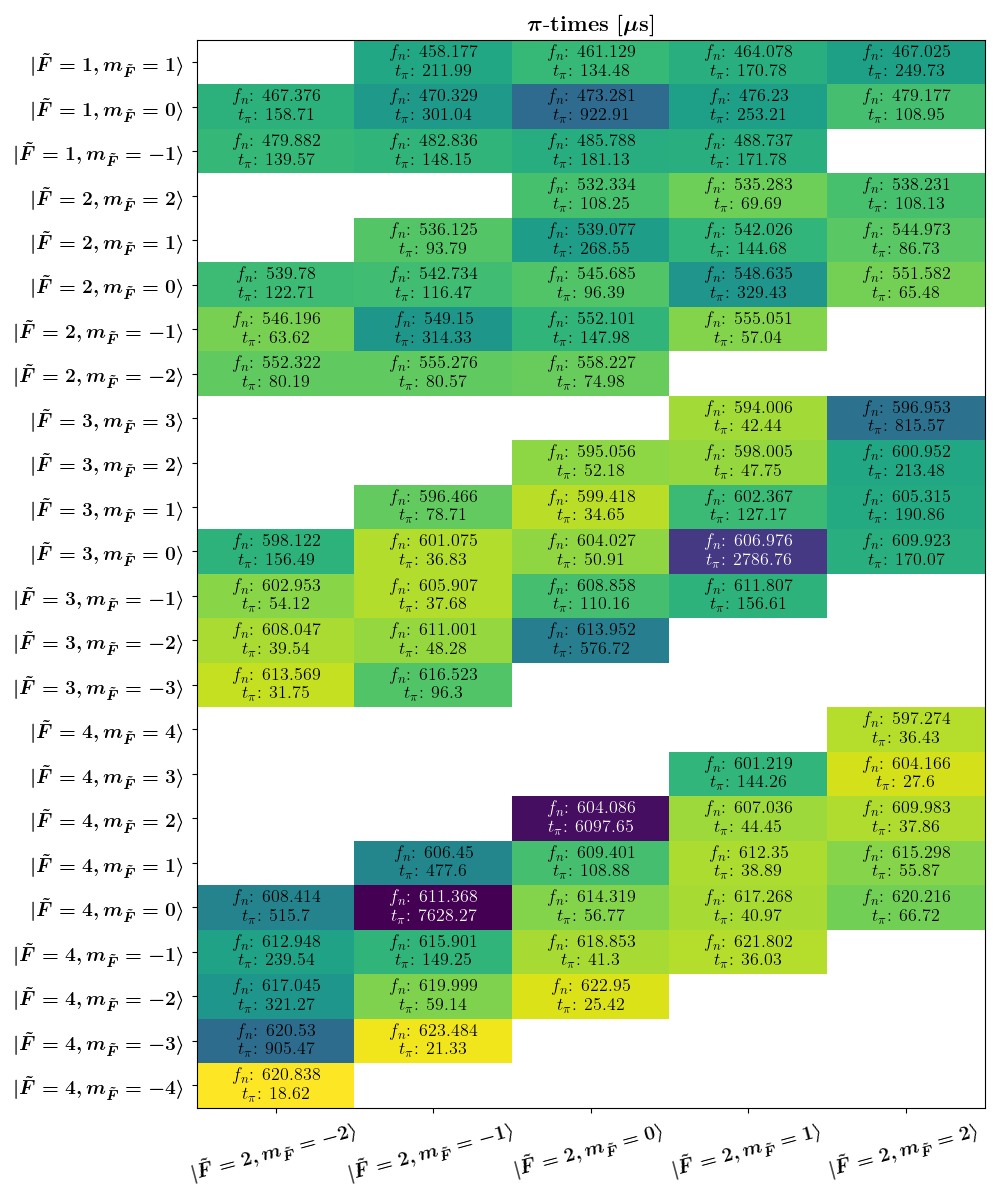

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

from matplotlib import rcParams
import matplotlib.lines as mlines
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

# Increase font sizes
rcParams['axes.titlesize'] = 28      # Title of the plot
rcParams['axes.labelsize'] = 20      # Axis labels
rcParams['xtick.labelsize'] = 24     # X tick labels
rcParams['ytick.labelsize'] = 24     # Y tick labels
rcParams['legend.fontsize'] = 18     # Legend text
rcParams['figure.titlesize'] = 28    # Figure-wide title (if used)


Fs = [1,2,3,4]
row_labels = []
for i in Fs:
    for j in range(2*i+1):
        mF = i-j
        row_labels.append([i,mF])
col_labels = [-2, -1, 0, 1, 2]

ket_lables_row = []
for i in row_labels:
    # ket_lables_row.append(r'$|\tilde{{F}} =$'+ f'{i[0]}'+r'$,m_\tilde{{F}} = $'+f'{i[1]}'+r'$ \rangle$')
    # ket_lables_row.append(rf'$|\tilde{{F}} = {i[0]},\,m_\tilde{{F}} = {i[1]}\rangle$')
    # ket_lables_row.append(rf'$\left|\tilde{{F}} = {i[0]},\,m_\tilde{{F}} = {i[1]}\right\rangle$')
     ket_lables_row.append(rf'\boldmath$|\tilde{{F}} = {i[0]}, m_{{\tilde{{F}}}} = {i[1]}\rangle$')
    # ket_lables_row.append('1')

ket_lables_col = []
for i in col_labels:
    ket_lables_col.append(rf'\boldmath$|\tilde{{F}} = 2, m_{{\tilde{{F}}}} = {i}\rangle$')
    # ket_lables_col.append('1')


# Create figure and set size
fig, ax = plt.subplots(figsize=(10, 12))
cax = ax.imshow(np.log(pi_times), aspect='auto', cmap='viridis_r')

# Add labels
ax.set_xticks(np.arange(len(col_labels)))
ax.set_yticks(np.arange(len(row_labels)))
ax.set_xticklabels(ket_lables_col, rotation=15, ha='center', fontsize=14)
ax.set_yticklabels(ket_lables_row, fontsize=14)

# # Annotate each cell with the numerical value
norm = Normalize(vmin=np.log(pi_times).min(), vmax=np.log(pi_times).max())
sm = ScalarMappable(norm=norm, cmap='viridis')

for i in range(len(row_labels)):
    for j in range(len(col_labels)):
        value = pi_times[i, j]
        freq_val = freqs[i,j]
        color = sm.to_rgba(value)
        luminance = (0.299 * color[0] + 0.587 * color[1] + 0.114 * color[2])
        text_color = 'white' if np.abs(value) > 1000 else 'black'
        # print(type(value))
        if value != 0:
            label_text = (
                rf'$f_n$: {np.round(freq_val, 3)}' + '\n' +
                rf'$t_{{\pi}}$: {np.round(value,2)}'
            )
            ax.text(j, i, label_text, ha='center', va='center', color=text_color, fontsize=13)

# import matplotlib.patches as patches

# col_index_map = {val: idx for idx, val in enumerate(col_labels)}
# row_index_map = {tuple(val): idx for idx, val in enumerate(row_labels)}

# # Draw boxes
# for col_val, F, mF in cali_trans_list:
#     row_key = (F, mF)
#     if col_val in col_index_map and row_key in row_index_map:
#         col_idx = col_index_map[col_val]
#         row_idx = row_index_map[row_key]
#         rect = patches.Rectangle(
#             (col_idx - 0.5, row_idx - 0.5), 1, 1,
#             linewidth=2, edgecolor='red', facecolor='none')
#         ax.add_patch(rect)

# ref_trans_list = [[0,2,0],[-1,4,-3]]

# for col_val, F, mF in ref_trans_list:
#     row_key = (F, mF)
#     if col_val in col_index_map and row_key in row_index_map:
#         col_idx = col_index_map[col_val]
#         row_idx = row_index_map[row_key]
        
#         inset = 0.0  # shrink from each side

#         rect = patches.Rectangle(
#             (col_idx - 0.5 + inset, row_idx - 0.5 + inset), 1 - 2*inset, 1 - 2*inset,
#             linewidth=2, edgecolor='black', facecolor='none'
#         )
#         ax.add_patch(rect)


# import matplotlib.patches as patches
# from matplotlib.transforms import IdentityTransform

# circle_transitions = [[-2, 4, -4], [2, 4, 2], [2, 4, 3],[2,4,4], [-2,3,-3]]  # your list of transitions

# for col_val, F, mF in circle_transitions:
#     row_key = (F, mF)
#     if col_val in col_index_map and row_key in row_index_map:
#         col_idx = col_index_map[col_val]
#         row_idx = row_index_map[row_key]

#         # Data coordinates where the ellipse should be centered
#         x_data = col_idx + 0.4  # offset slightly to the right of cell center
#         y_data = row_idx

#         # Get transformation from data to display (pixels)
#         trans = ax.transData.transform
#         inv = ax.transData.inverted().transform

#         # Convert one unit in x and y from data to display coords
#         dx_disp = trans((1, 0))[0] - trans((0, 0))[0]
#         dy_disp = trans((0, 1))[1] - trans((0, 0))[1]

#         # Scale radius so the ellipse appears as a circle in screen space
#         radius_disp = min(dx_disp, dy_disp) * 0.15  # display-space radius
#         radius_data_x = radius_disp / dx_disp
#         radius_data_y = radius_disp / dy_disp

#         ellipse = patches.Ellipse(
#             (x_data, y_data), width=2*radius_data_x, height=2*radius_data_y,
#             facecolor='red', edgecolor='red', linewidth=1
#         )
#         ax.add_patch(ellipse)


            # ax.text(j, i, rf'$f_n:${np.round(freq_val,3)}'+'\n' + rf'$\kappa:${value:.5f}', ha='center', va='center', color=text_color, fontsize=10)
# print(this worked)
# Add colorbar
# cbar = fig.colorbar(cax)
# plt.show()
# Set title
ax.set_title(r'\boldmath$\pi$-\textbf{times} \boldmath$[\mu$\textbf{s]}', fontsize=16)
plt.tight_layout()
plt.savefig('pi_times.svg')
plt.show()


In [98]:
%matplotlib widget

In [ ]:
print(cali_trans_list)